# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [160]:
# Load pickled data
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
from PIL import Image
import pickle
import numpy as np
import cv2
import tensorflow as tf

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train_orig, y_train_orig = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


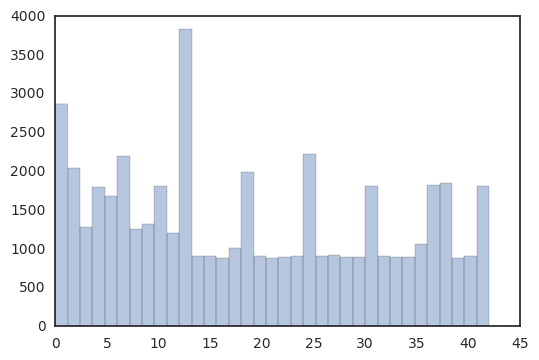

In [161]:

# Visualizations will be shown in the notebook.
%matplotlib inline
sns.set_style("white")

sns.distplot(y_train,kde=False)

In [162]:

data = pd.read_csv("./signnames.csv")
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [163]:



#print(X_train_new[0][0][0])
#print(type(X_train_new))
#print(X_train[0].astype(np.float32))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [164]:
### Replace each question mark with the appropriate value.
X_train = np.copy(X_train_orig)
y_train = np.copy(y_train_orig)
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [165]:
"""
Plots the variations in the diagrams
"""
def plot_variations(X,X_orig,y_train, sign_name,num_var,num_examples = 5 ): 
    fig, axes = plt.subplots(nrows=num_examples, ncols=num_var+1)
    index_list = []
    sign_name_list =[]
    pad = 5 # in points

    for j in range(1,num_examples+1) :
        y_index = random.randint(0,len(y_train))
        index_list.append(y_index)
        sign_name_list.append(sign_name[y_train[y_index]])
    
    ax_lbls = axes[:,0]
    for ax, row in zip(ax_lbls, sign_name_list):
        ax.annotate(row.replace(" ","\n"), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='small', ha='right', va='center')
        #ax.set_ylabel(row.replace(" ","\n"), rotation=0, size='small')  
    
    for j in range(1,num_examples+1) :
        y_index = index_list[j-1]
        image_index = y_index*num_var
        
        
        ax1 = axes[j-1,0]
        #ax1 = plt.subplot(num_examples,num_var,k)
        ax1.imshow(X_orig[y_index])
        ax1.get_xaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])
        for i in range(1,num_var +1):
            k = (num_var*(j-1))+i
            im_index = int(str(num_examples)+str(num_var)+str(k))
            
            ax1 = axes[j-1,i]
            #ax1 = plt.subplot(num_examples,num_var,k)
            ax1.imshow(X[image_index+i-1])
            ax1.get_xaxis().set_ticks([])
            ax1.get_yaxis().set_ticks([])
          
    #ax1.set_ylabel(sign_name[y_train[y_index]], rotation=0, size='small')
    fig.tight_layout()

In [166]:


"""
Converts the array of images into gray scale images

"""
def gray_scale(X):
    X_gray = []
    for each in X:
        #print(np.shape(each))
        gray_image = np.asarray(cv2.cvtColor(each, cv2.COLOR_RGB2GRAY))
        #print(type(gray_image))
        X_gray.append(np.expand_dims(gray_image,axis=2))
    #plt.imshow(X_gray[0])
    return X_gray


# Rotation of image 
"""
Rotate the image clockwise and counter clock wise. [-6,-4,-2,0,2,4,6]
6 images per image.

"""
def image_rotation(X,y):
    rot_X = []
    rot_y = []
    for ex,ey in zip(X,y):
        img = Image.fromarray(ex)
        
        i = random.randrange(-10,10)
        im2 = img.convert('RGBA')
        new_image = im2.rotate(i)
        # a white image same size as rotated image
        blank_img = Image.new('RGBA', (32,32), (255,)*4)
        # create a composite image using the alpha layer of rot as a mask
        out = Image.composite(new_image, blank_img, new_image)
        out.convert('RGB')
        rot_X.append(np.asarray(out))
        rot_y.append(ey)
    return rot_X,rot_y
"""
Blur the image with a kernel of 5x5

"""
def image_blur(X,y,kernel_size=5):
    blur_X =[]
    blur_y = []
    for ex,ey in zip(X,y):
        #kernel = np.ones((kernel_size,kernel_size),np.float32)/25
        blr_img = cv2.GaussianBlur(ex,(kernel_size,kernel_size),0)
        #blr_img = cv2.filter2D(ex,-1,kernel)
        blur_X.append(blr_img)
        blur_y.append(ey)
    return blur_X,blur_y

def noisy_data(X,y):
    row,col,ch = np.shape(X[0])
    noisy_X = []
    noisy_y = []
    for ex,ey in zip(X,y):
        noisy_image = np.asarray(
                        np.random.uniform(
                        -5,5,(row,col,ch))
                    ,dtype=np.uint8)+ex
               
        noisy_X.append(noisy_image)
        noisy_y.append(ey)
    return noisy_X,noisy_y

"""
Contrast Increase using HSV values.
"""
def contrast_increase_data(X,y,value=5):
    row,col,ch = np.shape(X[0])
    contra_X = []
    contra_y = []
    for ex,ey in zip(X,y):
        #contra_image = np.array(cv2.cvtColor(ex,cv2.COLOR_RGB2YUV),dtype=np.float32)
        
        im2 = cv2.cvtColor(ex, cv2.COLOR_RGB2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        X_ = clahe.apply(im2)        
               
        contra_X.append(X_)
        contra_y.append(ey)
    return contra_X,contra_y


def transform_data(X,y,count=1000):
    ang_range = 20
    trans_range = 10
    shear_range = 5
    X_new = []
    y_new = []
    for ex,ey in zip(X,y):
        ang_rot = np.random.uniform(ang_range)-ang_range/2
        rows,cols,ch = np.shape(ex)    
        Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
        
        tr_x = trans_range*np.random.uniform()-trans_range/2
        tr_y = trans_range*np.random.uniform()-trans_range/2
        Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

        pts1 = np.float32([[5,5],[20,5],[5,20]])

        pt1 = 5+shear_range*np.random.uniform()-shear_range/2
        pt2 = 20+shear_range*np.random.uniform()-shear_range/2
        pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

        shear_M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(ex,Rot_M,(cols,rows))
        img = cv2.warpAffine(img,Trans_M,(cols,rows))
        img = cv2.warpAffine(img,shear_M,(cols,rows))
        X_new.append(img)
        y_new.append(ey)
    return X_new,y_new

### Preprocessing set output (Contrast increase and gray scale)

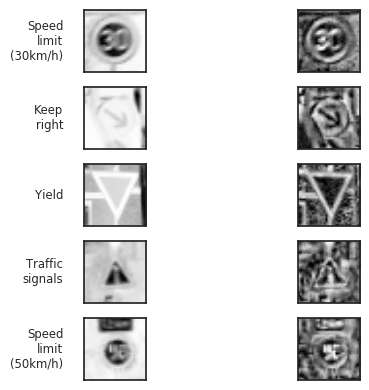

In [167]:
sign_name = list(data.SignName)
X_rot,y_rot = contrast_increase_data(X_train,y_train,value=200)
X_new = X_rot
X_train_gray = np.reshape(gray_scale(X_train),(len(X_train),32,32))
plot_variations(np.reshape(X_new,(len(X_new),32,32)),X_train_gray,y_train,sign_name,1,5)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### Modified LetNet for traffic Sign classifier

In [168]:
def transform_image(X,y):
    ang_range = 20
    trans_range = 10
    shear_range = 5
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = np.shape(X)   
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(X,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    
    
    return img,y

In [169]:
def augment_data(X_train,y_train,class_min_count=1000):
    MIN_CLASS_LEN=class_min_count
    X_final = []
    y_final = []
    for i in range(43):
        indexes = np.where(y_train==i)
        idx = np.reshape(indexes, (np.shape(indexes)[1]))
        len_class = np.shape(indexes)[1]
        X_class = X_train[idx]
        #print(np.shape(X_class))
        #plt.imshow(X_class[0],cmap="gray")
        y_class = np.asarray(y_train)[idx]
        X_class_new = np.asarray(np.copy(X_class))
        y_class_new = np.copy(y_class)
        if(len_class<MIN_CLASS_LEN):
            #print(len_class)
            for i in range(0,MIN_CLASS_LEN-len_class):
                index = random.randint(0,len_class-1)
                new_image,y = transform_image(X_class[index],y_class[index])
                X_final.append(new_image)
                #print(y)

                y_final.append(y)

        for ex,ey in zip(X_class_new,y_class_new):
            X_final.append(ex)        
            y_final.append(ey)
    return X_final,y_final

X_final,y_final = augment_data(X_train,y_train)
    #print(len(y_final))

### After augmentation of data (Adding more data to the classes with less data)

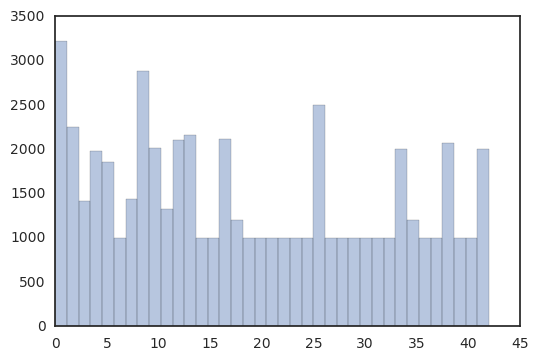

In [170]:
sns.distplot(y_final,kde=False)

In [171]:
X_train_contrast,y_train_contrast = contrast_increase_data(X_final,y_final)

X_test_final,y_test_final = contrast_increase_data(X_test,y_test)

In [172]:
X_test_final = np.asarray(np.expand_dims(np.asarray(X_test_final) ,axis=3))

In [173]:
X_train_augmented = np.asarray(np.expand_dims(np.asarray(X_train_contrast) ,axis=3))
y_train_augmented = np.expand_dims(y_train_contrast,axis=1)
from sklearn.utils import shuffle

X,y = shuffle(X_train_augmented,y_train_augmented)


In [174]:
import math
X_validation_final = X[:math.ceil(len(y)/10):,:,]
y_validation_final = y[:math.ceil(len(y)/10)]
X_train_final = X[math.ceil(len(y)/10):,:,]
y_train_final = y[math.ceil(len(y)/10):]
y_train_final  = np.reshape(y_train_final,np.shape(y_train_final)[0])

y_validation_final  = np.reshape(y_validation_final,np.shape(y_validation_final)[0])

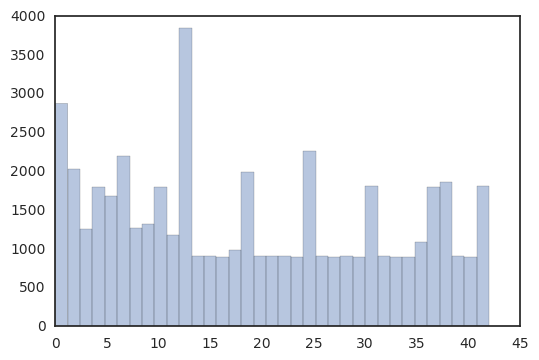

In [175]:
sns.distplot(y_train_final,kde=False)

In [176]:
print(np.shape(X_validation_final))
print(np.shape(X_train_final))
print(np.shape(X_train_augmented))

print(np.shape(y_validation_final))
print(np.shape(y_train_final))
print(np.shape(y_train_augmented))


(5471, 32, 32, 1)
(49239, 32, 32, 1)
(54710, 32, 32, 1)
(5471,)
(49239,)
(54710, 1)


(12630,)


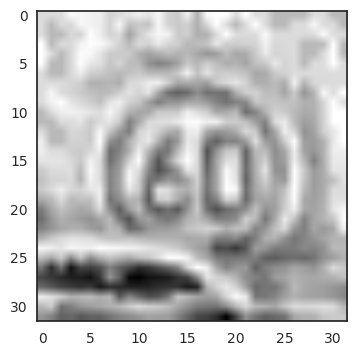

In [177]:
plt.imshow(np.reshape(X_test_final[23],(32,32)),cmap="gray")
print(np.shape(y_test_final))

In [178]:
y_train_final[23]

12

In [179]:
X_new = X_train_final#.astype(float)
X_new = X_new.astype(float)
m = np.mean(X_train_final)
st = np.std(X_train_final)
X_new-=m
X_train_final = X_new /255.0

X_val = X_validation_final#.astype(float)
X_val = X_val.astype(float)
X_val-=m
X_validation_final = X_val /255.0

X_test = X_test_final#.astype(float)
X_test = X_test.astype(float)
X_test-=m
X_test_final = X_test /255.0

In [180]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf


def conv2d(x,weight,bias,strides=1,padding='SAME'):
    layer = tf.nn.conv2d(x,weight,[1,strides,strides,1],padding=padding)
    layer = tf.nn.bias_add(layer,bias)
    layer = tf.nn.relu(layer)
    return layer

def maxpool(x,k=2,padding='SAME'):
    kernel_size = [1,k,k,1]
    return tf.nn.max_pool(x,ksize=kernel_size,strides=[1,k,k,1],padding=padding)
    
 

In [181]:
def fully_connected(in_tensor,layers,keep_prob):
    mu = 0
    sigma = 0.1
    in_dim = np.product(in_tensor.get_shape().as_list()[1:])
    tensor_flatten = flatten(in_tensor)
    print(in_dim)
    count = 1
    for each in layers:
        with tf.name_scope("fully-connected-"+str(count)):
            weights = tf.Variable(tf.random_normal([in_dim, each],mu,sigma,dtype=tf.float32))
            bias =  tf.Variable(tf.zeros(each))

            fc1_drop = tf.nn.dropout(tensor_flatten, keep_prob)    
            fc2 = tf.add(
            tf.matmul(fc1_drop, weights),
            bias)
            # TODO: Activation.
            tensor_flatten = tf.nn.tanh(fc2)
            in_dim = each
        count = count +1
        print(in_dim)
    
    return tensor_flatten
import tensorflow.contrib.slim as slim
      

def LeNet_multi_batchnorm(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    with tf.name_scope('CNN'):
        
        with tf.name_scope('conv1'):
            input_layer = slim.conv2d(x,40,[3,3],activation_fn=None)
            with tf.name_scope('batch-norm'):
                input_layer_1 = slim.batch_norm(input_layer,activation_fn=None)
            with tf.name_scope('relu'):
                input_layer_1 = tf.nn.relu(input_layer_1)
            with tf.name_scope('maxpool'):
                layer_1 = maxpool(input_layer_1,k=2)
        print(layer_1.get_shape())
        with tf.name_scope('conv2'):
            input_layer_2 = slim.conv2d(layer_1,60,[3,3],activation_fn=None)
            with tf.name_scope('batch-norm'):
                input_layer_2 = slim.batch_norm(input_layer_2,activation_fn=None)
            with tf.name_scope('relu'):
                input_layer_2 = tf.nn.relu(input_layer_2)
            with tf.name_scope('maxpool'):
                layer_2 = maxpool(input_layer_2,k=2)
            with tf.name_scope('dropout'):
                layer_2 = tf.nn.dropout(layer_2, keep_prob)
        print(layer_2.get_shape())

        with tf.name_scope('conv3'):
            input_layer_3 = slim.conv2d(layer_2,125,[3,3],activation_fn=None)
            with tf.name_scope('batch-norm'):
                input_layer_3 = slim.batch_norm(input_layer_3,activation_fn=None)
            with tf.name_scope('relu'):
                input_layer_3 = tf.nn.relu(input_layer_3)
            with tf.name_scope('maxpool'):
                layer_3 = maxpool(input_layer_3,k=2)
            with tf.name_scope('dropout'):
                layer_3 = tf.nn.dropout(layer_3, keep_prob)
        print(layer_3.get_shape())

        
        fc1 = flatten(layer_3)
    #     fc1 = tf.concat(1,(fc1,flatten(layer_1)))
    
        with tf.name_scope('fully-connected'):
            logits = fully_connected(fc1,[512,512,43],keep_prob)
    return logits

In [182]:
INPUT_DEPTH = 1
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_DEPTH))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [183]:

BATCH_SIZE = 256

In [184]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



In [185]:
rate = 0.001

logits = LeNet_multi_batchnorm(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Gradient clipping
gvs = optimizer.compute_gradients(loss_operation)
capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
optimizer.apply_gradients(capped_gvs)

training_operation = optimizer.minimize(loss_operation)

(?, 16, 16, 40)
(?, 8, 8, 60)
(?, 4, 4, 125)
2000
512
512
43


In [186]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [187]:
np.shape(y_train_final)

(49239,)

In [189]:
import os
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
EPOCHS = 100
model_file = "./final_version_review_v2"
# model_file = "./lenet_multi_batch_norm_final_v5"
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples =len(X_train)#392090
    from pathlib import Path
    

    my_file = Path(model_file+".meta")
    if my_file.is_file():
        saver.restore(sess,model_file)
        print("Model restored...")
    print("Training...")
    print()
    X_train_1 = X_train_final
    y_train_1 = y_train_final
    train_writer = tf.train.SummaryWriter('./train',sess.graph)
    print("Total "+str(len(y_train_1)))
    for i in range(EPOCHS):

        X_train, y_train = shuffle(X_train_1, y_train_1)
        acc = []
        ent = []
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = np.copy(X_train[offset:end]), np.copy(y_train[offset:end])
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.8})
            training_accuracy = evaluate(batch_x, batch_y)
            mean_cross_entropy = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
            acc.append(training_accuracy)
            ent.append(mean_cross_entropy)
            
        validation_accuracy = evaluate(X_validation_final, y_validation_final)
        
        
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(np.mean(acc)))
        print("Cross entropy = {:.4f}".format(np.mean(ent)))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if(i%10==0):
            saver.save(sess, model_file)
            print("Model saved")
    test_accuracy = evaluate(X_test, y_test_final)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, model_file)
    print("Model saved")

Training...

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Total 49239
EPOCH 1 ...
Training Accuracy = 0.145
Cross entropy = 3.2192
Validation Accuracy = 0.269
Model saved
EPOCH 2 ...
Training Accuracy = 0.358
Cross entropy = 2.6433
Validation Accuracy = 0.437
EPOCH 3 ...
Training Accuracy = 0.487
Cross entropy = 2.4659
Validation Accuracy = 0.528
EPOCH 4 ...
Training Accuracy = 0.556
Cross entropy = 2.3593
Validation Accuracy = 0.560
EPOCH 5 ...
Training Accuracy = 0.618
Cross entropy = 2.2798
Validation Accuracy = 0.664
EPOCH 6 ...
Training Accuracy = 0.689
Cross entropy = 2.2239
Validation Accuracy = 0.718
EPOCH 7 ...
Training Accuracy = 0.732
Cross entropy = 2.1828
Validation Accuracy = 0.733
EPOCH 8 ...
Training Accuracy = 0.770
Cross entropy = 2.1467
Validation Accuracy = 0.774
EPOCH 9 ...
Training Accuracy = 0.800
Cross entropy = 2.1184
Validation Accuracy = 0.816
EPOCH 10 ...
Training Accuracy =

#### Test Accuracy : 96.9%

In [192]:
# Reducing the Entropy running more iterations

In [ ]:
rate = 0.001 #fine tune with smaller rate
EPOCHS = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples =len(X_train_final)#392090
    from pathlib import Path
    model_save = "final_finetuning_v2"

    my_file = Path(model_file+".meta")
    if my_file.is_file():
        saver.restore(sess,model_file)
        print("Model restored...")
    print("Training...")
    X_train_1 = X_train_final
    y_train_1 = y_train_final
    train_writer = tf.train.SummaryWriter('./train',sess.graph)
    print("Total "+str(len(y_train_1)))
    for i in range(EPOCHS):

        X_train, y_train = shuffle(X_train_1, y_train_1)
        acc = []
        ent = []
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = np.copy(X_train[offset:end]), np.copy(y_train[offset:end])
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.75})
            training_accuracy = evaluate(batch_x, batch_y)
            mean_cross_entropy = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
            acc.append(training_accuracy)
            ent.append(mean_cross_entropy)
            
        validation_accuracy = evaluate(X_validation_final, y_validation_final)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(np.mean(acc)))
        print("Cross entropy = {:.4f}".format(np.mean(ent)))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if(i%10==0):
            saver.save(sess, model_save)
            print("Model saved")
    test_accuracy = evaluate(X_test, y_test_final)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, model_save)
    print("Model saved")

Model restored...
Training...
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
Total 49239
EPOCH 1 ...
Training Accuracy = 0.999
Cross entropy = 1.9016
Validation Accuracy = 0.993
Model saved
EPOCH 2 ...
Training Accuracy = 0.999
Cross entropy = 1.9017
Validation Accuracy = 0.991
EPOCH 3 ...
Training Accuracy = 0.999
Cross entropy = 1.9021
Validation Accuracy = 0.992
EPOCH 4 ...
Training Accuracy = 0.999
Cross entropy = 1.9022
Validation Accuracy = 0.992
EPOCH 5 ...
Training Accuracy = 0.999
Cross entropy = 1.9016
Validation Accuracy = 0.992
EPOCH 6 ...
Training Accuracy = 0.999
Cross entropy = 1.9015
Validation Accuracy = 0.993
EPOCH 7 ...
Training Accuracy = 0.999
Cross entropy = 1.9013
Validation Accuracy = 0.993
EPOCH 8 ...
Training Accuracy = 0.999
Cross entropy = 1.9013
Validation Accuracy = 0.992
EPOCH 9 ...
Training Accuracy = 0.999
Cross entropy = 1.9015
Validation Accuracy = 0.991
EPOCH 10 ...
Tr

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

Preprocessing steps : 
Gray scale conversion and contrast increase of the images are the two preprocessing that was done.

Even though the color gives us some indication on the type of sign, but training a grayscale image was much faster, with probably slight decrease in the performance. Initially, started off with the RGB images, but grayscale perforcewell as well. Also, when increased the contrast, some of the features in the image became much clearer.

Also, Normalized the data by subtracting the mean and dividing the values by 255 ( Max pixel value ),so that this gives stability in the weights that is learnt. Along with this, I have also used Gradient clipping so that the value does not go beyond -1 and 1. And have also used batch normalization at multiple layers (Layer wise, batchwise normalization, not just at the input level)

In [ ]:
### Generate data additional data (OPTIONAL!)
# With slight rotation only as flipping reverses the direction, so avoided some of the data preprocessing steps. 
# Contrast increase 
# 
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Data was generated using the following methods 
1. Adding noise ( To make CNN roboust to noise , Note : was not used in the final submission, This added high bias, might have to be careful how much to use)
2. Bluring of the image ( Some were used initial training. This plus few other trick took the model from 94 % validation accuracy to 96% )
3. Lot more data was generated as some of the classes had liited set of data ( Rotation, Shear, Zoom etc was used). These techniques were from the fourm discussions and helper methods.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Model consists of the following layers 

3 Conv layers with depth 40 , 60 and 125 with 3x3 filter , stride 1

Alternating each of these layers is a 2x2 Maxpool with a stride of 2

Batch normalization is done after relu in each of these conv,maxpool pair

2 Fully connected layer of size 512 with dropouts layer. 

Gradient clipping is done across all the parameters (-1,1)


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Architecture diagram + Tensorflow graph.


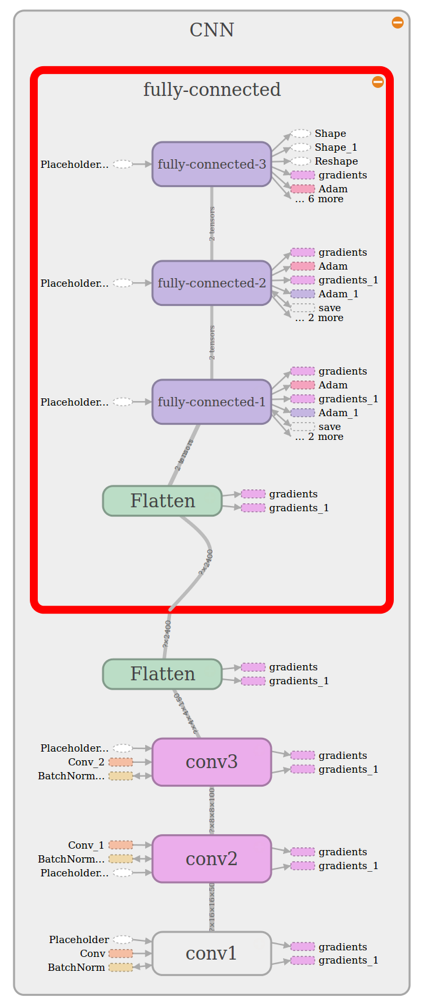

In [104]:
img = Image.open("./CNN_graph.png")
img

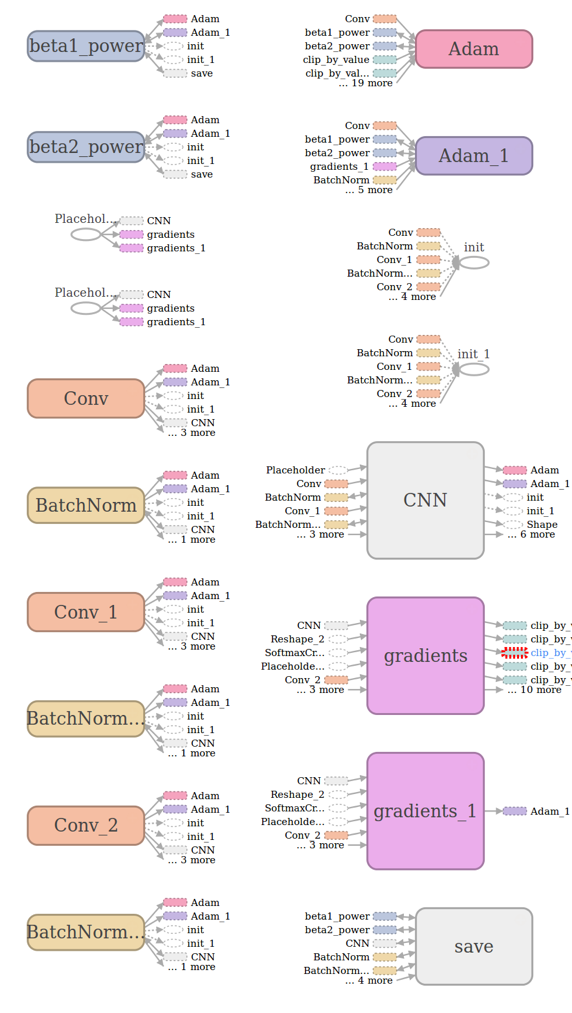

In [103]:
img = Image.open("./CNN_components.png")
img

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Optimizer : Adam 
2. EPOCS tried : For some of the larger models that I tried upto 200 EPOCS , but smaller models would fit within 50 EPOCS.
3. Batch size : 128,256,512 and 1024 was tried , 256 seems to be the best for the current model.
4. learning rate : 0.01 to 0.0001 was tried, higher learning rate would diverge and lower would take its own time to coverge, 0.001 was the best for the model ( Coverges within 100 EPOCS ).

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Things tried 
1. Augment Data with -5 degree to 5 degree purterbation 
2. Gray scale (Image convert)
3. Image Normalization 
4. LeNet Architecture 
5. Adding the drop out layer for the fully connected piece 
6. Simpler model for Gray scale ( 94 % validation ). Removing the one layer of fully connected.
7. Layers were added to the LeNet architecture
8. ResNet, Multi-scale and Inception Models were tried, but the convergence was very slow compared to simpler models, But could give better result if trained well.

Data Augmentation was done: Following things were tried
1. Noise to te input data
2. Blurring of the input data
3. Rotation of the data (-15 to 15 )
4. Ideas from the fourm were incorporated as well, shear, rotation and 

When it was Overfitting following things were added 
9. Regularizer/ Gradient clipping.
10. Batch Normalization

Following things are yet to be tried:

1. Fine tune of the model using even more data augmentation

Initially took trial & error approach but later Roughly, following method was used to train the models ( example error rate )


| Human Error       | Training Error  | Validation Error|
| ------------- |:--:|
| 1%     | 5% | 6%|

<center>High Bias case 
Resolution : Train bigger model, More data

--------------------------------------------------------

| Human Error       | Training Error  | Validation Error|
| ------------- |:--:|
| 1%     | 2% | 10%|
<center>High Varriance case  (Overfitting)
Resolution : Regulariser, early stopping, More data



#### Reference:
Andrew Ng's Presentation on nuts and bolts of deep learning : https://www.youtube.com/watch?v=F1ka6a13S9I

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [203]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from os import listdir
from os.path import isfile, join
def extra_data():
    training_dirs =[]
    l = []
    dirs = listdir("Training/")
    for each in dirs:
        if( not each.endswith("txt")):
            training_dirs.append(each)
    for each in training_dirs:
        dirs_inner = listdir("Training/"+each)
        for e in dirs_inner:
            if(e.endswith(".ppm")):
                l.append(join("Training",each,e)) 
    return l

def image_resize(images):
    image_list = []
    for i in images:
        img = Image.open(i)
        img = img.resize((32, 32), Image.ANTIALIAS)
        image_list.append(img)
    return image_list


l = extra_data()

In [204]:

"""
Plots the images
"""
def plot_images(X,n_rows,n_cols ): 
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
    for i in range(n_rows):
        for j in range(n_cols) :
            ax1 = axes[i,j]
            #ax1 = plt.subplot(num_examples,num_var,k)
            ax1.imshow(X[n_cols*i+j])
            ax1.get_xaxis().set_ticks([])
            ax1.get_yaxis().set_ticks([])
    plt.show()
    fig.tight_layout()


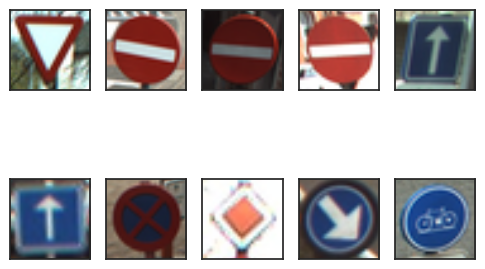

In [205]:
SAMPLE_SIZE = 10
ims = random.sample(l,SAMPLE_SIZE)
X_new_imgs = image_resize(ims)
plot_images(X_new_imgs,2,5)

#### Reference:
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [215]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# X_train_contrast_new,y_train_contrast_new = contrast_increase_data(np.asarray(X_new_imgs),np.ones(SAMPLE_SIZE))#dummy)
# X_train_augmented_new = np.asarray(np.expand_dims(np.asarray(X_train_contrast_new) ,axis=3))
im_array = [np.asarray(im) for im in X_new_imgs]
X_train_contrast_new,y_train_contrast_new = contrast_increase_data(np.asarray(im_array),np.ones(SAMPLE_SIZE))#dummy)
X_train_new_images = np.asarray(np.expand_dims(np.asarray(X_train_contrast_new) ,axis=3))

In [222]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples =len(X_train_fine)#392090
    from pathlib import Path

    my_file = Path(model_file+".meta")
    if my_file.is_file():
        saver.restore(sess,model_file)
    logit_out = sess.run(logits,feed_dict ={x:X_train_new_images,keep_prob:1.0})
    softmax_out = sess.run(tf.nn.softmax(logit_out))

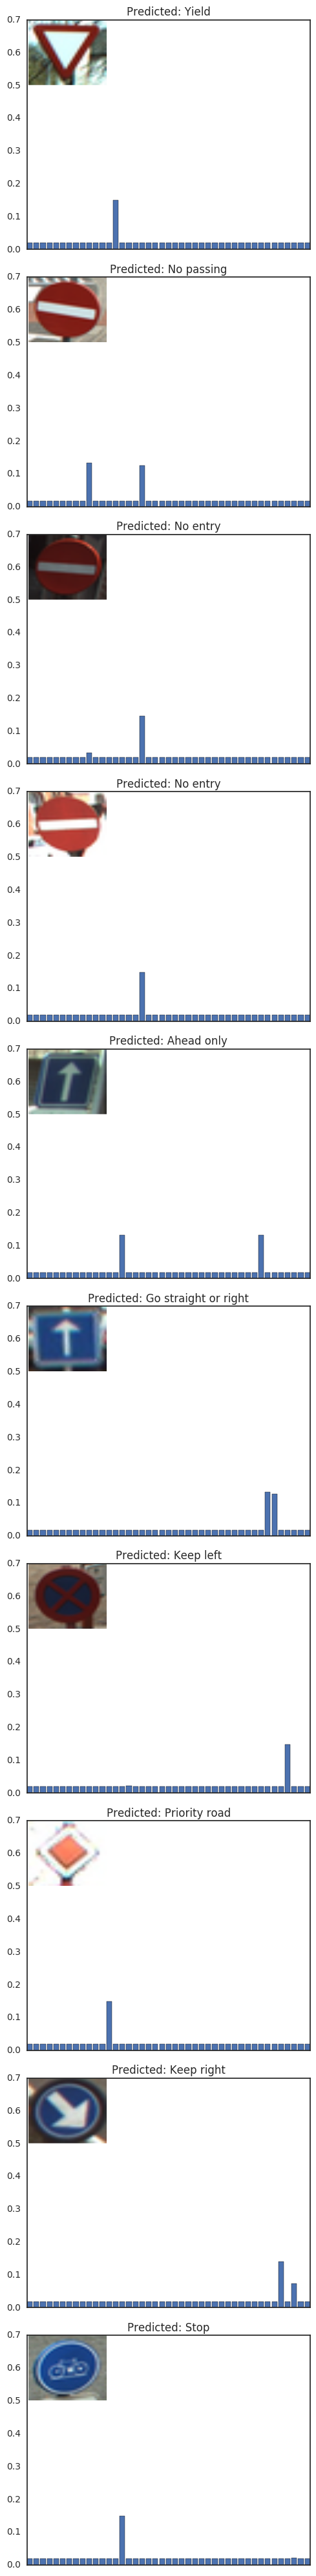

In [277]:

fig, axes = plt.subplots(figsize=(5, 40),nrows=10)

n_rows = 10
n_cols = 1

for i in range(n_rows):
    ax1 = axes[i]
    ax1.imshow(X_new_imgs[i], aspect='auto', extent=(0.2, 12.0, .5, .7), zorder=-1)
    ax1.get_xaxis().set_ticks([])
    #ax1.get_yaxis().set_ticks([])
    ind = range(len(softmax_out[i]))
    rects1 = ax1.bar(ind, softmax_out[i])
    st = data.SignName[int(np.argmax(softmax_out[i]))]
    ax1.set_title("Predicted: "+st)
fig.tight_layout()

#### Observation

1. Eventhough the accuracy of the model is high (96.9% ). The entropy seems to be high as well, hence the confidence on prediction is not that high.
2. Some of the signs that are not in the training data are pridicted wrong. Bicycle , get confused to stop (Note we do not use color)
3. Some of the ones it gets wrong are Ahead only. Also, there is confusion between "No passing" and "No entry", As the two vehicles that are close together might get confused for no entry.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


In [291]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples =len(X_train_fine)#392090
    from pathlib import Path

    my_file = Path(model_file+".meta")
    if my_file.is_file():
        saver.restore(sess,model_file)
    
    for i in range(43):
        indexes = np.where(np.asarray(y_test_final)==i)
        #print(len(indexes[0]))
        idx = np.reshape(indexes, (np.shape(indexes)[1]))
        len_class = np.shape(indexes)[1]
        X_class = X_test_final[idx]
        logit_out = sess.run(logits,feed_dict ={x:X_class,keep_prob:1.0})
        softmax_out = sess.run(tf.nn.softmax(logit_out))
        accurate = 0
        for each in softmax_out:
            if np.argmax(each) == i:
                accurate=accurate+1
        print("Accuracy for ", data.SignName[i], " : ",np.float(accurate)/len(indexes[0]))
        
    

Accuracy for  Speed limit (20km/h)  :  0.9333333333333333
Accuracy for  Speed limit (30km/h)  :  0.9666666666666667
Accuracy for  Speed limit (50km/h)  :  0.984
Accuracy for  Speed limit (60km/h)  :  0.9
Accuracy for  Speed limit (70km/h)  :  0.9348484848484848
Accuracy for  Speed limit (80km/h)  :  0.8698412698412699
Accuracy for  End of speed limit (80km/h)  :  0.42
Accuracy for  Speed limit (100km/h)  :  0.9333333333333333
Accuracy for  Speed limit (120km/h)  :  0.8422222222222222
Accuracy for  No passing  :  0.9291666666666667
Accuracy for  No passing for vehicles over 3.5 metric tons  :  0.8939393939393939
Accuracy for  Right-of-way at the next intersection  :  0.9166666666666666
Accuracy for  Priority road  :  0.9420289855072463
Accuracy for  Yield  :  0.9847222222222223
Accuracy for  Stop  :  0.9518518518518518
Accuracy for  No vehicles  :  0.8428571428571429
Accuracy for  Vehicles over 3.5 metric tons prohibited  :  0.9666666666666667
Accuracy for  No entry  :  0.95277777777777

**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Cross entropy seems to be high as it seems to give small probabilities to each class.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [296]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples =len(X_train_fine)#392090
    from pathlib import Path

    my_file = Path(model_file+".meta")
    if my_file.is_file():
        saver.restore(sess,model_file)
    
    for i in range(43):
        indexes = np.where(np.asarray(y_test_final)==i)
        #print(len(indexes[0]))
        idx = np.reshape(indexes, (np.shape(indexes)[1]))
        len_class = np.shape(indexes)[1]
        X_class = X_test_final[idx]
        logit_out = sess.run(tf.nn.softmax(logits), feed_dict ={x:X_class,keep_prob:1.0})
        prediction = sess.run(tf.nn.top_k(logit_out, k=5, sorted=True))
        #print(prediction[1])
        accurate = 0
        for prob in prediction[1]:
            if i in prob:
                accurate=accurate+1
        print("Top 5 Accuracy for ", data.SignName[i], " : ",np.float(accurate)/len(indexes[0]))

Top 5 Accuracy for  Speed limit (20km/h)  :  1.0
Top 5 Accuracy for  Speed limit (30km/h)  :  0.9958333333333333
Top 5 Accuracy for  Speed limit (50km/h)  :  0.9973333333333333
Top 5 Accuracy for  Speed limit (60km/h)  :  0.9644444444444444
Top 5 Accuracy for  Speed limit (70km/h)  :  0.9651515151515152
Top 5 Accuracy for  Speed limit (80km/h)  :  0.9841269841269841
Top 5 Accuracy for  End of speed limit (80km/h)  :  0.6866666666666666
Top 5 Accuracy for  Speed limit (100km/h)  :  0.9777777777777777
Top 5 Accuracy for  Speed limit (120km/h)  :  0.94
Top 5 Accuracy for  No passing  :  0.9875
Top 5 Accuracy for  No passing for vehicles over 3.5 metric tons  :  0.9681818181818181
Top 5 Accuracy for  Right-of-way at the next intersection  :  0.9904761904761905
Top 5 Accuracy for  Priority road  :  1.0
Top 5 Accuracy for  Yield  :  0.9972222222222222
Top 5 Accuracy for  Stop  :  0.9925925925925926
Top 5 Accuracy for  No vehicles  :  0.919047619047619
Top 5 Accuracy for  Vehicles over 3.5 me